In [17]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset
data = load_iris()

# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the 'Species' column to the DataFrame
df['Species'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
df = df[df['Species'] != 0][['sepal width (cm)','petal length (cm)','Species']]
df.head()

,sepal width (cm),petal length (cm),Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


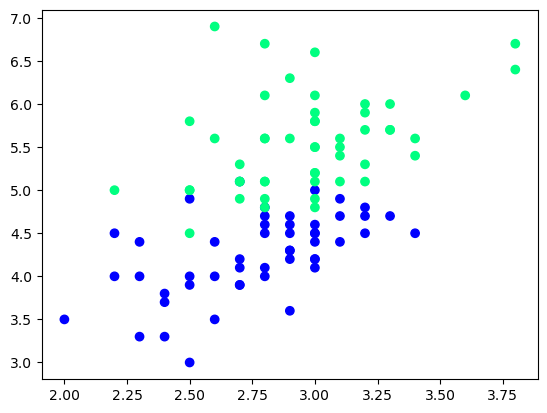

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'],c=df['Species'],cmap='winter')

In [23]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal width (cm),petal length (cm),Species
55,2.8,4.5,1
66,3.0,4.5,1
97,2.9,4.3,1
90,2.6,4.4,1
54,2.8,4.6,1
105,3.0,6.6,2
87,2.3,4.4,1
52,3.1,4.9,1
58,2.9,4.6,1
81,2.4,3.7,1


In [24]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

df_train

,sepal width (cm),petal length (cm),Species
118,2.6,6.9,2
148,3.4,5.4,2
121,2.8,4.9,2
143,3.2,5.9,2
67,2.7,4.1,1
108,2.5,5.8,2
55,2.8,4.5,1
147,3.0,5.2,2
135,3.0,6.1,2
57,2.4,3.3,1


In [25]:
df_val

,sepal width (cm),petal length (cm),Species
82,2.7,3.9,1
66,3.0,4.5,1
78,2.9,4.5,1
141,3.1,5.1,2
139,3.1,5.4,2


In [26]:
df_test

,sepal width (cm),petal length (cm),Species
50,3.2,4.7,1
58,2.9,4.6,1
72,2.5,4.9,1
122,2.8,6.7,2
77,3.0,5.0,1


In [27]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [28]:
y_test

array([1, 1, 1, 2, 2], dtype=int64)

In [65]:
X_test

array([[2.7, 3.9],
       [3. , 4.5],
       [2.9, 4.5],
       [3.1, 5.1],
       [3.1, 5.4]])

# Case 1 - Bagging

In [44]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [45]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
148,3.4,5.4,2
108,2.5,5.8,2
108,2.5,5.8,2
55,2.8,4.5,1
135,3.0,6.1,2
135,3.0,6.1,2
55,2.8,4.5,1
147,3.0,5.2,2


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

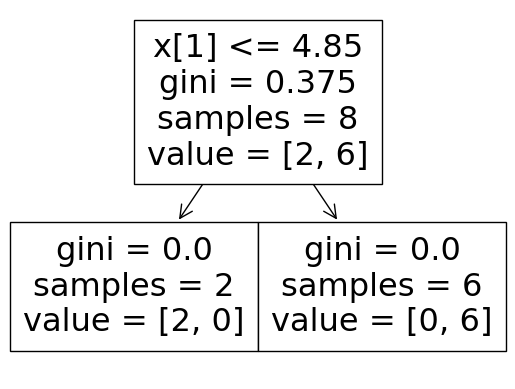

C:\Users\91975\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91975\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


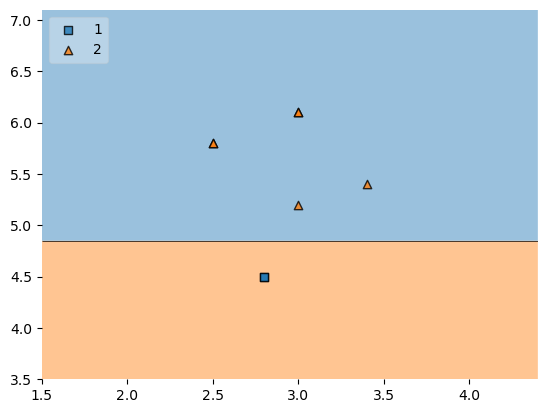

In [47]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

In [48]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),Species
67,2.7,4.1,1
147,3.0,5.2,2
121,2.8,4.9,2
108,2.5,5.8,2
67,2.7,4.1,1
121,2.8,4.9,2
118,2.6,6.9,2
135,3.0,6.1,2


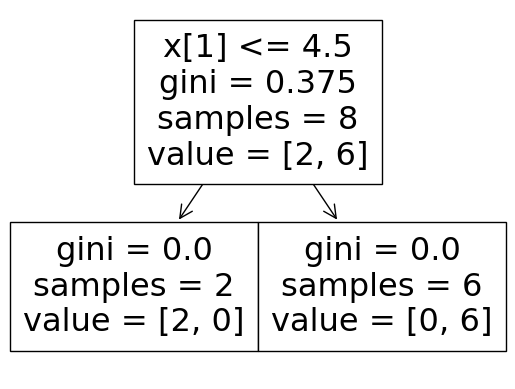

C:\Users\91975\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91975\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


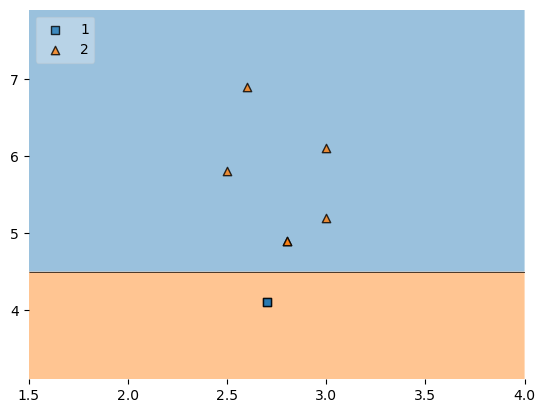

In [49]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [50]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),Species
57,2.4,3.3,1
67,2.7,4.1,1
135,3.0,6.1,2
67,2.7,4.1,1
108,2.5,5.8,2
67,2.7,4.1,1
55,2.8,4.5,1
147,3.0,5.2,2


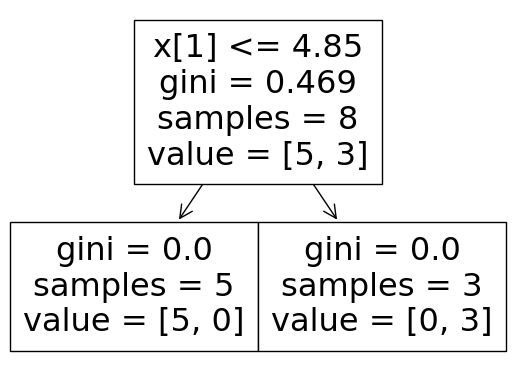

C:\Users\91975\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91975\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


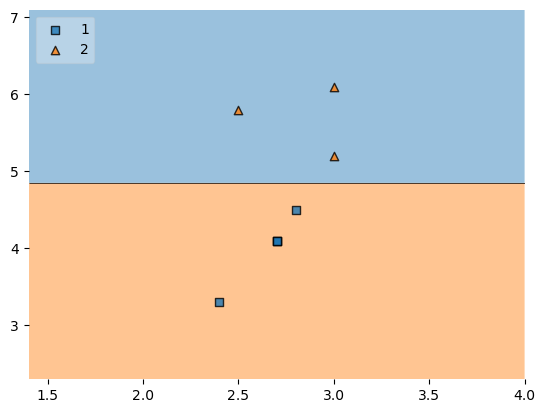

In [51]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict

In [52]:
df_test

,sepal width (cm),petal length (cm),Species
50,3.2,4.7,1
58,2.9,4.6,1
72,2.5,4.9,1
122,2.8,6.7,2
77,3.0,5.0,1


In [66]:
print("Predictor 1",dt_bag1.predict(np.array([3.0,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.0,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.0,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\91975\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91975\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91975\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Pasting

In [54]:
# Row sampling without replacement
df_train

,sepal width (cm),petal length (cm),Species
118,2.6,6.9,2
148,3.4,5.4,2
121,2.8,4.9,2
143,3.2,5.9,2
67,2.7,4.1,1
108,2.5,5.8,2
55,2.8,4.5,1
147,3.0,5.2,2
135,3.0,6.1,2
57,2.4,3.3,1


In [55]:
df_train.sample(8)

,sepal width (cm),petal length (cm),Species
135,3.0,6.1,2
148,3.4,5.4,2
147,3.0,5.2,2
121,2.8,4.9,2
55,2.8,4.5,1
57,2.4,3.3,1
143,3.2,5.9,2
67,2.7,4.1,1


## Random Subspaces

In [57]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset
data = load_iris()

# Convert the dataset into a pandas DataFrame
df1 = pd.DataFrame(data.data, columns=data.feature_names)

# Add the 'Species' column to the DataFrame
df1['Species'] = data.target
df1=df1.sample(10)
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
28,5.2,3.4,1.4,0.2,0
80,5.5,2.4,3.8,1.1,1
84,5.4,3.0,4.5,1.5,1
105,7.6,3.0,6.6,2.1,2
87,6.3,2.3,4.4,1.3,1
65,6.7,3.1,4.4,1.4,1
34,4.9,3.1,1.5,0.2,0
24,4.8,3.4,1.9,0.2,0
110,6.5,3.2,5.1,2.0,2
101,5.8,2.7,5.1,1.9,2


In [61]:
df1.sample(2,replace=True,axis=1)

,Species,sepal width (cm)
28,0,3.4
80,1,2.4
84,1,3.0
105,2,3.0
87,1,2.3
65,1,3.1
34,0,3.1
24,0,3.4
110,2,3.2
101,2,2.7


## Random Patches

In [62]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
28,5.2,3.4,1.4,0.2,0
80,5.5,2.4,3.8,1.1,1
84,5.4,3.0,4.5,1.5,1
105,7.6,3.0,6.6,2.1,2
87,6.3,2.3,4.4,1.3,1
65,6.7,3.1,4.4,1.4,1
34,4.9,3.1,1.5,0.2,0
24,4.8,3.4,1.9,0.2,0
110,6.5,3.2,5.1,2.0,2
101,5.8,2.7,5.1,1.9,2


In [64]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,sepal length (cm),petal width (cm)
87,6.3,1.3
65,6.7,1.4
24,4.8,0.2
110,6.5,2.0
105,7.6,2.1
84,5.4,1.5
80,5.5,1.1
28,5.2,0.2
